# Código ejemplo Codificador 7 segmentos
### Jesus Daniel Caballero Colina
### Inteligencia Artificial y Minirobots

Para el desarrollo de este ejercicio primero se creó la clase del árbol binario orientado al uso de la programación genética con operadores lógicos. En este caso, el conjunto de terminales es ___in1___, ___in2___, ___in3___, ___in4___, que son los primeros 4 bits del ___Byte___ que se recibe para convertir a entradas del 7 segmentos; el conjunto de funciones primitivas es  ___'not'___, ___'and'___, ___'or'___, ___'xor'___. La aptitud de un algoritmo ___y = f(x)___ se midió con la siguiente fórmula:

\begin{equation}
apt(f,x^*,y^*) = \frac{10}{1.4^{\sum_{j=0}^{m} (f(x_j^*) \oplus y_k^*)}}
\end{equation}

donde $\oplus$ es una operación ___xor___, ___j___ son cada caso de la tabla de verdad y ___m___ son los números de casos de la tabla de verdad. En nuestro caso, para el entrenamiento del arbol, se tomó la siguiente tabla de verdad:

<div>
<img src="Segmentos_7.png" width="400"/>
</div>

Por lo cual, los valores de la aptitud vs aciertos tabla siguen la siguiente tendencia:

<div>
<img src="Grafica_Aptitud.png" width="400"/>
</div>

Con ello se desarrollaron las funciones:
- ___leer\_csv(name)___: Devuelve los valores de entrada y los valores de salida de la tabla de verdad que se guarda en el archivo 'name.csv'.
- ___validate\_funs(funs)___: Devuelve la lista de funciones válidas de las que se encuentran ingresadas en el array ___funs___, además devuelve por separado las operaciones validas de 1 entrada y de 2 entradas. Devuelve un array vacío si ninguna de las funciones dentro del array está implementado en la clase de árbol binario (véase abajo la lista de funciones implementadas).
- ___genera_arbol(funs,n,p\_max=100)___: Genera arbol binario aleatorio válido para programación genética. Esta generación se encuentra limitada a una cierta lista de funciones ___funs___, con un número de nodos ___n___. 
- ___aptitud(arbol,entradas,sal_esperadas)___: Devuelve la aptitud del ___arbol___ teniendo las entradas esperadas en ___entradas___ y las salidas esperadas en ___salidas___.
- ___sel_pond(lst,probability)___: Función que devuelve un elemento de la lista ___lst___ escogido con una probabilidad ponderada en ___probability___.
- ___seleccion(pob,apt)___: Devuelve una población con posibles elementos listados en ___pob___ y en la proporción ___apt___.
- ___cruce(a1,a2,n\_max = 10)___: Devuelve los 2 hijos obtenidos mediante el cruce de los arboles ___a1___ y ___a2___, de tal manera que el tamaño máximo de estos hijos no supere ___n\_max___.
- ___cruce_pob(poblacion, n\_max = 10)___: Cruza 2 en 2 los integrantes de la población ___poblacion___, de tal manera que ningún hijo sobrepase el tamaño ___n\_max___.
- ___mutar(arbol,fun,Pm,num\_entradas)___: Muta el arbol ___arbol___, teniendo las posibles lista de posibles funciones ___fun___, con una probabilidad de mutar de ___Pm___ y un numero de entradas esperadas ___num\_esperadas___.

Por lo cual, el programa está compuesto por 7 árboles con 4 entradas cada uno. Cada árbol se originó apartir de una población de 50, hasta máximo 100 generaciones.


In [1]:
%matplotlib inline
import sys
import copy
sys.setrecursionlimit(10**3)
import os
import csv
#CALCULOS
import re
import math
import numpy as np
import random
from numpy.random import randint,rand
import copy
#GRAFICOS
import cv2
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from IPython.display import clear_output
#TIEMPOS
import  time
#GUARDAR ARBOLES
import pickle

### Clase Árbol Binario - OPERADORES LOGICOS (___Binary_Tree___)
Se implementó una estrutura de datos tipo arbol binario compatible con los principales operadores lógicos para su uso en programación genética. Además se implementaron los siguientes métodos:
- ___num_nodos(self)___: Función auxiliar que retorna el numero de nodos con valores en un arbol. Retorna 0 si el arbol no tiene nodos con valores.
- ___profundidad(self)___: Función auxiliar que retorna la profundidad del arbol,
- ___ext_subarbol(self)___: Función que retorna algún subarbol aleatorio (incluyendo el arbol completo).
- ___insert(self,val,camino)___: Función para insertar el valor ___val___ siguiendo el camino ___camino___. ___camino___ es una variable de tipo array que contiene 3 opciones de instrucción: ___'left', 'right', 'detener'___. El último elemento del array (y solo ese) puede poseer el valor de ___'detener'___.
- ___getoutput(self)___: Función que retorna el resultado del arbol, teniendo en cuenta las operaciones implementadas.
- ___preorden(self)___: Función que retorna un array con los valores con el recorrido de tipo Preorden. Retorna un array vacia si no hay valores dentro.
- ___inorden(self)___: Función que retorna un array con los valores con el recorrido de tipo Inorden. Retorna un array vacia si no hay valores dentro.
- ___posorden(self)___: Función que retorna un array con los valores con el recorrido de tipo Posorden. Retorna un array vacia si no hay valores dentro.

In [2]:
class BinaryTree:
    def __init__(self, val = None):
        if val != None:
            if type(val) == int or type(val) == bool:
                self.val = bool(val)
            elif type(val) == str:
                val_funs,_,_ = validate_funs()
                if val in val_funs or bool(re.match('^in(\d+)$',val)):
                    self.val = val
                else:
                    raise Exception("Val no válido") from None
            else:
                raise Exception("Val no válido") from None
        else:
            self.val = None

        self.left = None
        self.right = None
    
    def num_nodos(self):
        x = 0
        if self.val is not None:
            x += 1
        if self.left is not None:
            x += self.left.num_nodos()
        if self.right is not None:
            x += self.right.num_nodos()
        return x
    
    def profundidad(self):
        if self.val:
            a = 0
            b = 0
            if self.left is not None:
                a = self.left.profundidad()
            if self.right is not None:
                b = self.right.profundidad()
            return 1+max(a,b)
        else:
            return 0
    
    def ext_subarbol(self):
        decision = 'iniciar'
        arbol = copy.deepcopy(self)
        camino = []
        it = 0
        while decision != 'detener':
            opciones = []
            if it > 0:
                opciones.append('detener')
            if arbol.left is not None:
                opciones.append('left')
            if arbol.right is not None:
                opciones.append('right')

            decision = opciones[randint(0,len(opciones))]
            camino.append(decision)
            if decision == 'detener':
                subarbol = arbol
            elif decision == 'left':
                arbol = arbol.left
            else:
                arbol = arbol.right
            it += 1
            
        return subarbol,camino
    
    def insert(self, val, camino):
        arbol = copy.deepcopy(self)
        if camino[0] == 'left':
            if arbol.left is not None:
                arbol.left = arbol.left.insert(val,camino[1:len(camino)])
            else:
                raise Exception("Camino inválido para el arbol")
        elif camino[0] == 'right':
            if arbol.right is not None:
                arbol.right = arbol.right.insert(val,camino[1:len(camino)])
            else:
                raise Exception("Camino inválido para el arbol")
        else:
            if type(val) == BinaryTree:
                arbol = val
            else:
                arbol.val = val
        return arbol
    
    def getoutput(self,entradas):
        entradas1 = copy.deepcopy(entradas)
        entradas1 = [bool(i) for i in entradas1]
        if type(self.val) == bool:
            return self.val
        elif type(self.val) == str:
            try:
                # NODOS CON ENTRADAS
                if re.findall('^in(\d+)$',self.val):
                    frac = re.findall('^in(\d+)$',self.val)
                    try:
                        return entradas1[int(frac[0])-1]
                    except:
                        raise Exception("Numero de entradas insuficientes") from None
                # FUNCIONES CON DOS ENTRADAS
                elif self.left and self.right:
                    if self.val == 'and':
                        return self.left.getoutput(entradas1) and self.right.getoutput(entradas1)
                    elif self.val == 'or':
                        return self.left.getoutput(entradas1) or self.right.getoutput(entradas1)
                    elif self.val == 'xor':
                        return bool(self.left.getoutput(entradas1) ^ self.right.getoutput(entradas1))
                    # SI NO SE ENCONTRO LA OPERACION
                    else:
                        return None
                # FUNCIONES CON UNA ENTRADA
                elif self.left or self.right:
                    if self.left is not None:
                        arbol = self.left
                    else:
                        arbol = self.right

                    if self.val.lower() == 'not':
                        return not arbol.getoutput(entradas1)
                    # SI NO SE ENCONTRO LA OPERACION
                    else:
                        None
                # SI ES UNA OPERACION SI HIJOS
                else:
                    None
            except:
                raise Exception('ERROR - Cálculo output erróneo de algún subarbol')
        else:
            raise Exception('ERROR - Val de algún árbol no reconocido') from None
    
    def preorden(self):
        x = []
        if self.val is not None:
            x.append(self.val)
        if self.left is not None:
            for subnode in self.left.preorden():
                x.append(subnode)
        if self.right is not None:
            for subnode in self.right.preorden():
                x.append(subnode)
        return x
    
    def inorden(self):
        x = []
        if self.left is not None:
            for subnode in self.left.inorden():
                x.append(subnode)
        if self.val is not None:
            x.append(self.val)
        if self.right is not None:
            for subnode in self.right.inorden():
                x.append(subnode)
        return x
    
    def posorden(self):
        x = []
        if self.left is not None:
            for subnode in self.left.posorden():
                x.append(subnode)
        if self.right is not None:
            for subnode in self.right.posorden():
                x.append(subnode)
        if self.val is not None:
            x.append(self.val)
        return x
    

## Funciones PG

In [3]:
def leer_csv(name):
    entradas = np.zeros([10,4])
    sal_esperadas = np.zeros([10,7])
    num = np.zeros([10,1])

    with open(name) as File:
        reader = csv.reader(File, delimiter=';', quotechar=';',
                            quoting=csv.QUOTE_MINIMAL)
        i = 0
        for row in reader:
            if i > 0 and i<11:
                entradas[i-1,:] = np.flip(np.array(row[0:4]),0)
                sal_esperadas[i-1,:] = np.array(row[4:11])
                num[i-1,:] = np.array(row[11])
            i += 1
    
    return entradas,sal_esperadas,num

def validate_funs(funs = None):
    oper1 = ['not']
    oper2 = ['or', 'and', 'xor']
    if funs is None:
        return oper1+oper2,oper1,oper2
    else:
        val_funs = []
        funs1 = []
        funs2 = []
        for fun in funs:
            if fun in oper1:
                funs1.append(fun)
                val_funs.append(fun)
            if fun in oper2:
                funs2.append(fun)
                val_funs.append(fun)
        return val_funs,funs1,funs2

def genera_arbol(funs,n,num_entradas,p_max=100):
    if n == 0:
        return None
    # SI N=1 ENTONCES ES UN NODO HOJA (TIENE VAL NUMERICO)
    elif n == 1:
        entrada = 'in' + str(randint(1,num_entradas+1))
        return BinaryTree(entrada)
    # SI N=2 ENTONCES ES UN ARBOL CON UN NOD OPER1 Y ABAJO DE ESTE UNA HOJA
    elif n == 2:
        _,funs1,_ = validate_funs(funs)
        if len(funs1) == 0:
            raise Exception('Lista de funciones no válida') from None
        else:
            arbol = BinaryTree(funs1[randint(0,len(funs1))])
            arbol.left = genera_arbol(funs1,1,num_entradas)
            return arbol
    else:
        val_funs,funs1,funs2 = validate_funs(funs)
        if len(val_funs) == 0:
            raise Exception('Lista de funciones no válida') from None
        else:
            oper = val_funs[randint(0,len(val_funs))]
            if oper in funs1:
                arbol = BinaryTree(oper)
                arbol.left = genera_arbol(val_funs,n-1,num_entradas)
                return arbol
            else:
                if len(funs1) == 0:
                    k1 = 2
                    while k1 == 2 or k1 == n-3:
                        k1 = randint(1,n-1)
                else:
                    k1 = randint(1,n-1)
                k2 = n-1-k1
                arbol = BinaryTree(oper)
                arbol.left = genera_arbol(val_funs,k1,num_entradas)
                arbol.right = genera_arbol(val_funs,k2,num_entradas)
                return arbol

#FUNCIÓN DE EVALUACIÓN DE APTITUD
def aptitud(arbol,entradas,sal_esperadas):
    if type(arbol) == BinaryTree:
        apt = np.zeros([1,1],float)
        sal_reales = np.zeros(sal_esperadas.shape,bool)
        for i in range(entradas.shape[0]):
            sal_reales[i] = arbol.getoutput(entradas[i,:])
        apt[0,0] = 10/1.4**sum(sal_esperadas^sal_reales)
    else:
        apt  = np.zeros([len(arbol),1],float)
        j = 0
        for arb in arbol:
            sal_reales = np.zeros(sal_esperadas.shape,bool)
            for i in range(entradas.shape[0]):
                sal_reales[i] = arb.getoutput(entradas[i,:])            
            apt[j,0] = 10/1.4**sum(sal_esperadas^sal_reales)
            j += 1
            
    return apt
            
# FUNCIÓN PARA SELECCIÓN DE OPCION CON DIFERENTES PROBABILIDADES
def sel_pond(lst,probability):
    zipped = zip(lst,probability)
    lst = [[i[0]] * int(i[1]*100) for i in zipped]
    new = [b for i in lst for b in i]
    return random.choice(new)

def seleccion(pob,apt,Entradas=None,Sal_esperadas=None):
    apt_global = sum(apt)
    probability = [apt_crom/apt_global for apt_crom in apt]
    
    pob_sel = []
    for i in range(len(pob)):
        pob_sel.append(sel_pond(pob,probability))
    
    if Entradas is not None and Sal_esperadas is not None:
        apt = aptitud(pob_sel,Entradas,Sal_esperadas)
        pob_sel[np.where(apt == np.amin(apt,axis=0))[0][0]] = pob_sel[np.where(apt == np.amax(apt,axis=0))[0][0]]
        apt = aptitud(pob_sel,Entradas,Sal_esperadas)
        pob_sel[np.where(apt == np.amin(apt,axis=0))[0][0]] = pob_sel[np.where(apt == np.amax(apt,axis=0))[0][0]]
    
    return pob_sel
    
def cruce(a1,a2,tamano_max = 10):
    intentos = 0    
    while intentos < 50:
        sa1,camino1 = a1.ext_subarbol()
        sa2,camino2 = a2.ext_subarbol()
        n1_new = a1.num_nodos() - sa1.num_nodos() + sa2.num_nodos()
        n2_new = a2.num_nodos() - sa2.num_nodos() + sa1.num_nodos()
        if n1_new < tamano_max and n2_new < tamano_max:
            break
        else:
            intentos +=1

    if intentos < 50:
        try:
            h1 = a1.insert(sa2,camino1)
            h2 = a2.insert(sa1,camino2)
        except:
            raise Exception('Error insertando subarbol')
    
        return h1,h2
    else:
        return a1,a2

# FUNCIÓN PARA CRUCE DE POBLACIÓN
def cruce_pob(poblacion, n_max = 10):
    rec = 0
    poblacion_hija = []
    while rec+1 < len(pob):
        h1,h2 = cruce(poblacion[rec],poblacion[rec+1], tamano_max = n_max)
        poblacion_hija.append(h1)
        poblacion_hija.append(h2)
        rec += 2
    return poblacion_hija

# FUNCIÓN PARA MUTACION DE POBLACIÓN
def mutar(arbol,fun,Pm,num_entradas,generacion,red_Pm=100000):
    opciones = ['Mutar','No mutar']
    prob = [Pm,1-Pm]
    opciones1 = ['Mutar','Mutar Completo','No mutar']
    prob1 = [Pm,Pm/(int(generacion/red_Pm)+1),1-Pm-Pm/(int(generacion/red_Pm)+1)]
    _,funs1,funs2 = validate_funs(funs)
    arbol_mut = copy.deepcopy(arbol)
    
    if arbol_mut.val is not None:
        decision = sel_pond(opciones,prob)
        if decision == 'Mutar':
            if arbol_mut.val in funs1:
                arbol_mut.val = funs1[randint(0,len(funs1))]
            elif arbol_mut.val in funs2:
                arbol_mut.val = funs2[randint(0,len(funs2))]
            elif re.match('^in(\d+)$',arbol.val):
                arbol_mut.val = 'in' + str(randint(1,num_entradas+1))
    
    if arbol_mut.left is not None:
        decision = sel_pond(opciones1,prob1)            
        if decision == 'Mutar':
            arbol_mut.left = mutar(arbol_mut.left,fun,Pm,num_entradas,generacion,red_Pm=red_Pm)
        elif decision == 'Mutar Completo':
            x = randint(0,arbol_mut.left.num_nodos())+1
            arbol_mut.left = genera_arbol(fun,x,num_entradas)
            
    if arbol_mut.right is not None:
        decision = sel_pond(opciones1,prob1)            
        if decision == 'Mutar':
            arbol_mut.right = mutar(arbol_mut.right,fun,Pm,num_entradas,generacion,red_Pm=red_Pm)
        elif decision == 'Mutar Completo':
            x = randint(0,arbol_mut.right.num_nodos())+1
            arbol_mut.right = genera_arbol(fun,x,num_entradas)
    
    return arbol_mut

# FUNCIÓN PARA MUTACION DE POBLACIÓN
def mut_pob(pob,fun,Pm,num_entradas,generacion,red_Pm=100000):
    if type(pob) == BinaryTree:
        arbol_mut = pob
        arbol_mut = mutar(arbol_mut,fun,Pm,num_entradas,generacion,red_Pm=red_Pm)
        return arbol_mut
    else:
        pob_mut = []
        for arbol in pob:
            arbol_mut = arbol
            arbol_mut = mutar(arbol_mut,fun,Pm,num_entradas,generacion,red_Pm=red_Pm)
            pob_mut.append(arbol_mut)
        return pob_mut

def pintar_num(num,arboles,arboles_,img_size=[80,50],space=2,line_width=2,line_large=[25,20]):
    rojo = (255,0,0)
    verde = (0,255,0)
    azul = (0,0,255)
    gris = (220,220,220)
    
    img = 255*np.ones((img_size[0],img_size[1],3), np.uint8)
    entrada = [bool(int(i)) for i in np.binary_repr(num,4)]
    entrada = entrada[::-1]
    
    
    num_size = [2*line_large[0]+3*line_width+4*space,line_large[1]+2*line_width+2*space]
    border2num = [(img_size[0]-num_size[0])/2,(img_size[1]-num_size[1])/2]
    
    a = [border2num[1]+line_width+space,border2num[0]+line_width/2,
         border2num[1]+line_width+space+line_large[1],border2num[0]+line_width/2]
    b = [img_size[1]-(border2num[1]+line_width/2),border2num[0]+line_width+space,
         img_size[1]-(border2num[1]+line_width/2),border2num[0]+line_width+space+line_large[0]]
    c = [img_size[1]-(border2num[1]+line_width/2),border2num[0]+2*line_width+3*space+line_large[0],
         img_size[1]-(border2num[1]+line_width/2),border2num[0]+2*line_width+3*space+2*line_large[0]]
    d = [border2num[1]+line_width+space,img_size[0]-(border2num[0]+line_width/2),
         border2num[1]+line_width+space+line_large[1],img_size[0]-(border2num[0]+line_width/2)]
    e = [border2num[1]+line_width/2,border2num[0]+2*line_width+3*space+line_large[0],
         border2num[1]+line_width/2,border2num[0]+2*line_width+3*space+2*line_large[0]]
    f = [border2num[1]+line_width/2,border2num[0]+line_width+space,
         border2num[1]+line_width/2,border2num[0]+line_width+space+line_large[0]]
    g = [border2num[1]+line_width+space,border2num[0]+3*line_width/2+2*space+line_large[0],
         border2num[1]+line_width+space+line_large[1],border2num[0]+3*line_width/2+2*space+line_large[0]]
    
    coor = []
    coor.append([int(i) for i in a])
    coor.append([int(i) for i in b])
    coor.append([int(i) for i in c])
    coor.append([int(i) for i in d])
    coor.append([int(i) for i in e])
    coor.append([int(i) for i in f])
    coor.append([int(i) for i in g])
    
    i = 0
    for coor_ in coor:
        if sol_tree[i].getoutput(entrada):
            if sol_tree[i].getoutput(entrada) ^ sol_tree_[i].getoutput(entrada):
                Color = verde
            else:
                Color = rojo
        else:
            if sol_tree[i].getoutput(entrada) ^ sol_tree_[i].getoutput(entrada):
                Color = azul
            else:
                Color = gris
        
        img = cv2.line(img,(coor_[0],coor_[1]),(coor_[2],coor_[3]),Color,line_width)
        i += 1
        
    return img

### Pruebas de Funciones
#### Prueba de función ___aptitud___

Nuevamente teniendo en cuenta la tabla de verdad:

<div>
<img src="Tabla_Verdad.png" width="400"/>
</div>

Por medio de cuadros de Karnaugh se hallan las expresiones lógicas de cada segmento:

\begin{align}
    a &= \overline{\bar{A_1}\bar{A_3}(A_2 \oplus A_0)}\\
    b &= \overline{A_2(A_1 \oplus A_0)}\\
    c &= \overline{\bar{A_3}\bar{A_2} A_1 \bar{A_0}}\\
    d &= \overline{(A_2+A_0)(\bar{A_1}+A_2)(\bar{A_1}+A_0)(\bar{A_2}+A_1+\bar{A_0}) }\\
    e &= \overline{(A_2+A_0)(\bar{A_1}+A_0)}\\
    f &= \overline{\bar{A_3}(A_1+A_0)(\bar{A_2}+A_1)(\bar{A_2}+A_0)}\\
    g &= \overline{\bar{A_3}(\bar{A_1}+A_0)(A_2 \oplus\bar{A_1})}
\end{align}

Estas expresiones se van a pasar a arboles binario y probar la aptitud de cada uno. La aptitud tiene un valor máximo de 10 (perfecta coincidencia).

In [4]:
name = 'Codificador_Segmentos7.csv'
entradas,sal_esperadas,num = leer_csv(name)
entradas = entradas.astype(bool)
sal_esperadas = sal_esperadas.astype(bool)

# RESPUESTA DE SEGMENTO A
arbol_a = BinaryTree('not')
arbol_a.left = BinaryTree('and')
arbol_a.left.left = BinaryTree('not')
arbol_a.left.left.left = BinaryTree('in2')
arbol_a.left.right = BinaryTree('and')
arbol_a.left.right.left = BinaryTree('not')
arbol_a.left.right.left.left = BinaryTree('in4')
arbol_a.left.right.right = BinaryTree('xor')
arbol_a.left.right.right.left = BinaryTree('in3')
arbol_a.left.right.right.right = BinaryTree('in1')

# RESPUESTA DE SEGMENTO B
arbol_b = BinaryTree('not')
arbol_b.left = BinaryTree('and')
arbol_b.left.left = BinaryTree('in3')
arbol_b.left.right = BinaryTree('xor')
arbol_b.left.right.left = BinaryTree('in2')
arbol_b.left.right.right = BinaryTree('in1')

# RESPUESTA DE SEGMENTO C
arbol_c = BinaryTree('not')
arbol_c.left = BinaryTree('and')
arbol_c.left.left = BinaryTree('not')
arbol_c.left.left.left = BinaryTree('in4')
arbol_c.left.right = BinaryTree('and')
arbol_c.left.right.left = BinaryTree('not')
arbol_c.left.right.left.left = BinaryTree('in3')
arbol_c.left.right.right = BinaryTree('and')
arbol_c.left.right.right.left = BinaryTree('in2')
arbol_c.left.right.right.right = BinaryTree('not')
arbol_c.left.right.right.right.left = BinaryTree('in1')

# RESPUESTA DE SEGMENTO D
arbol_d = BinaryTree('not')
arbol_d.left = BinaryTree('and')
arbol_d.left.left = BinaryTree('or')
arbol_d.left.left.left = BinaryTree('in1')
arbol_d.left.left.right = BinaryTree('in3')
arbol_d.left.right = BinaryTree('and')
arbol_d.left.right.left = BinaryTree('or')
arbol_d.left.right.left.left = BinaryTree('not')
arbol_d.left.right.left.left.left = BinaryTree('in2')
arbol_d.left.right.left.right = BinaryTree('in1')
arbol_d.left.right.right = BinaryTree('and')
arbol_d.left.right.right.left = BinaryTree('or')
arbol_d.left.right.right.left.left = BinaryTree('not')
arbol_d.left.right.right.left.left.right = BinaryTree('in2')
arbol_d.left.right.right.left.right = BinaryTree('in3')
arbol_d.left.right.right.right = BinaryTree('or')
arbol_d.left.right.right.right.left = BinaryTree('not')
arbol_d.left.right.right.right.left.left = BinaryTree('in1')
arbol_d.left.right.right.right.right = BinaryTree('or')
arbol_d.left.right.right.right.right.left = BinaryTree('in2')
arbol_d.left.right.right.right.right.right = BinaryTree('not')
arbol_d.left.right.right.right.right.right.left = BinaryTree('in3')

# RESPUESTA DE SEGMENTO E
arbol_e = BinaryTree('not')
arbol_e.left = BinaryTree('and')
arbol_e.left.left = BinaryTree('or')
arbol_e.left.left.left = BinaryTree('in3')
arbol_e.left.left.right = BinaryTree('in1')
arbol_e.left.right = BinaryTree('or')
arbol_e.left.right.left = BinaryTree('not')
arbol_e.left.right.left.left = BinaryTree('in2')
arbol_e.left.right.right = BinaryTree('in1')

# RESPUESTA DE SEGMENTO F
arbol_f = BinaryTree('not')
arbol_f.left = BinaryTree('and')
arbol_f.left.left = BinaryTree('not')
arbol_f.left.left.left = BinaryTree('in4')
arbol_f.left.right = BinaryTree('and')
arbol_f.left.right.left = BinaryTree('or')
arbol_f.left.right.left.left = BinaryTree('in2')
arbol_f.left.right.left.right = BinaryTree('in1')
arbol_f.left.right.right = BinaryTree('and')
arbol_f.left.right.right.left = BinaryTree('or')
arbol_f.left.right.right.left.left = BinaryTree('not')
arbol_f.left.right.right.left.left.right = BinaryTree('in3')
arbol_f.left.right.right.left.right = BinaryTree('in2')
arbol_f.left.right.right.right = BinaryTree('or')
arbol_f.left.right.right.right.left = BinaryTree('not')
arbol_f.left.right.right.right.left.left = BinaryTree('in3')
arbol_f.left.right.right.right.right = BinaryTree('in1')

# RESPUESTA DE SEGMENTO G
arbol_g = BinaryTree('not')
arbol_g.left = BinaryTree('and')
arbol_g.left.left = BinaryTree('not')
arbol_g.left.left.left = BinaryTree('in4')
arbol_g.left.right = BinaryTree('and')
arbol_g.left.right.left = BinaryTree('or')
arbol_g.left.right.left.left = BinaryTree('not')
arbol_g.left.right.left.left.left = BinaryTree('in2')
arbol_g.left.right.left.right = BinaryTree('in1')
arbol_g.left.right.right = BinaryTree('xor')
arbol_g.left.right.right.left = BinaryTree('in3')
arbol_g.left.right.right.right = BinaryTree('not')
arbol_g.left.right.right.right.left = BinaryTree('in2')

print("                                       TABLA DE VERDAD ARBOL")
print ("{:<3} {:<3} {:<3} {:<3} {:<4} {:<4} {:<4} {:<4} {:<4} {:<4} {:<4} {:<6} {:<6} {:<6} {:<6} {:<6} {:<6} {:<6}".format(
    "in4","in3","in2","in1","outA","outB","outC","outD","outE","outF","outG","outA**","outB**","outC**","outD**","outE**","outF**","outG**"))
for i in range(10):
    in1,in2,in3,in4 = entradas[i,:]
    outA = arbol_a.getoutput(entradas[i,:])
    outB = arbol_b.getoutput(entradas[i,:])
    outC = arbol_c.getoutput(entradas[i,:])
    outD = arbol_d.getoutput(entradas[i,:])
    outE = arbol_e.getoutput(entradas[i,:])
    outF = arbol_f.getoutput(entradas[i,:])
    outG = arbol_g.getoutput(entradas[i,:])
    outA_ = sal_esperadas[i,0]
    outB_ = sal_esperadas[i,1]
    outC_ = sal_esperadas[i,2]
    outD_ = sal_esperadas[i,3]
    outE_ = sal_esperadas[i,4]
    outF_ = sal_esperadas[i,5]
    outG_ = sal_esperadas[i,6]
    print (" {:<3} {:<3} {:<3} {:<3}  {:<4} {:<4} {:<4} {:<4} {:<4} {:<4} {:<4} {:<6} {:<6} {:<6} {:<6} {:<6} {:<6} {:<6}".format(
        in4,in3,in2,in1,outA,outB,outC,outD,outE,outF,outG,outA_,outB_,outC_,outD_,outE_,outF_,outG_))

print("APTITUD A: ",aptitud(arbol_a,entradas,sal_esperadas[:,0])[0])
print("APTITUD B: ",aptitud(arbol_b,entradas,sal_esperadas[:,1])[0])
print("APTITUD C: ",aptitud(arbol_c,entradas,sal_esperadas[:,2])[0])
print("APTITUD D: ",aptitud(arbol_d,entradas,sal_esperadas[:,3])[0])
print("APTITUD E: ",aptitud(arbol_e,entradas,sal_esperadas[:,4])[0])
print("APTITUD F: ",aptitud(arbol_f,entradas,sal_esperadas[:,5])[0])
print("APTITUD G: ",aptitud(arbol_g,entradas,sal_esperadas[:,6])[0])

sol_tree_ = []
sol_tree_.append(arbol_a)
sol_tree_.append(arbol_b)
sol_tree_.append(arbol_c)
sol_tree_.append(arbol_d)
sol_tree_.append(arbol_e)
sol_tree_.append(arbol_f)
sol_tree_.append(arbol_g)


                                       TABLA DE VERDAD ARBOL
in4 in3 in2 in1 outA outB outC outD outE outF outG outA** outB** outC** outD** outE** outF** outG**
 0   0   0   0    1    1    1    1    1    1    0    1      1      1      1      1      1      0     
 0   0   0   1    0    1    1    0    0    0    0    0      1      1      0      0      0      0     
 0   0   1   0    1    1    0    1    1    0    1    1      1      0      1      1      0      1     
 0   0   1   1    1    1    1    1    0    0    1    1      1      1      1      0      0      1     
 0   1   0   0    0    1    1    0    0    1    1    0      1      1      0      0      1      1     
 0   1   0   1    1    0    1    1    0    1    1    1      0      1      1      0      1      1     
 0   1   1   0    1    0    1    1    1    1    1    1      0      1      1      1      1      1     
 0   1   1   1    1    1    1    0    0    0    0    1      1      1      0      0      0      0     
 1   0   0   0    1    

#### Prueba de funciones  ___general_arbol___,  ___selección___, ___cruce___ y ___mutar___

In [5]:
funs = ['not','or', 'and', 'xor']
Pm = 0.1
pob = [genera_arbol(funs,6,4) for _ in range(10)]

print('--------------------- POB ---------------------')
for i in range(len(pob)):
    print(pob[i].preorden())
    
apt = aptitud(pob,entradas,sal_esperadas[:,0])     #PASO 2a
print('--------------------- APT ---------------------')
for i in range(len(apt)):
    print(apt[i])

print('Max:',np.amax(apt,axis=0),"en el puesto",np.where(apt == np.amax(apt,axis=0))[0][0])
    
pob_sel = seleccion(pob,apt)                       #PASO 2a.0
print('------------------- POB SEL -------------------')
for i in range(len(pob_sel)):
    print(pob_sel[i].preorden())



hijos = cruce_pob(pob_sel,n_max = 10)              #PASO 2a.ii
print('-------------------- HIJOS --------------------')
for i in range(len(hijos)):
    print(hijos[i].preorden())

hijos_mut = mut_pob(hijos,funs,Pm,4,0)                 #PASO 2a.iii
print('------------------ HIJOS MUT ------------------')
for i in range(len(hijos_mut)):
    print(hijos_mut[i].preorden())
    
apt = aptitud(hijos_mut,entradas,sal_esperadas[:,0])     #PASO 2a
print('------------------- APT MUT -------------------')
for i in range(len(apt)):
    print(apt[i])

pob = hijos_mut

--------------------- POB ---------------------
['xor', 'not', 'in3', 'or', 'in4', 'in4']
['xor', 'not', 'not', 'in4', 'not', 'in2']
['or', 'xor', 'in1', 'in4', 'not', 'in1']
['and', 'not', 'or', 'in3', 'in3', 'in1']
['or', 'in1', 'or', 'not', 'in1', 'in3']
['and', 'not', 'not', 'not', 'in1', 'in2']
['xor', 'not', 'not', 'in3', 'not', 'in4']
['and', 'or', 'not', 'in3', 'in2', 'in1']
['xor', 'in3', 'not', 'not', 'not', 'in1']
['or', 'not', 'in1', 'or', 'in1', 'in4']
--------------------- APT ---------------------
[1.32810309]
[0.67760362]
[3.64431487]
[0.94864506]
[5.10204082]
[1.32810309]
[1.32810309]
[1.32810309]
[3.64431487]
[5.10204082]
Max: [5.10204082] en el puesto 4
------------------- POB SEL -------------------
['xor', 'not', 'not', 'in3', 'not', 'in4']
['xor', 'in3', 'not', 'not', 'not', 'in1']
['and', 'or', 'not', 'in3', 'in2', 'in1']
['xor', 'not', 'in3', 'or', 'in4', 'in4']
['xor', 'not', 'in3', 'or', 'in4', 'in4']
['or', 'xor', 'in1', 'in4', 'not', 'in1']
['xor', 'not', 'n

#### Ejecución código Programación Genética

In [6]:
# PARÁMETROS ALGORITMO DE SOLUCIÓN DE PROBLEMA PROGRAMACIÓN GENÉTICA
funs = ['not','or', 'and', 'xor']                              # Funciones permitidas
K = 100                                                        # Tamaño población
n_inicial = 4                                                  # Tamaño inicial arboles aleatorios
N_max = 30                                                     # Tamaño máximo que puede tener los arboles
M_max = 1000                                                   # Número máximo de generaciones antes de detenerse
Pm = 0.1                                                       # Probabilidad de mutación (0.15)

# VARIABLES AUXILIARES
name = 'Codificador_Segmentos7.csv'                            # Archivo csv con tabla de verdad
entradas,sal_esperadas,num = leer_csv(name)                    # Entradas y salidas esperadas tabla de verdad
entradas = entradas.astype(bool)
sal_esperadas = sal_esperadas.astype(bool)
sol_tree = []                                                  # Lista para guardar soluciones

# SOLUCIÓN DE PROBLEMA DE PROGRAMACIÓN GENÉTICA
for i in range(7):
    generacion = 0                                                 # Número de generaciones ejecutadas hasta el momento
    apt_max = 0                                                    # Valor de aptitud máximo encontrado hasta el momento
    sol_max = BinaryTree('in1')                                    # Arbol con mejor aptitud encontrada hasta el momento
    
    pob = [genera_arbol(funs,n_inicial,4) for _ in range(K)]       # PASO 1
    apt = aptitud(pob,entradas,sal_esperadas[:,i])
    while generacion<M_max:                                        # PASO 2
        pob_sel = seleccion(pob,apt)                               # PASO 2b.0: ORIGINAL
        #pob_sel = seleccion(pob,apt,Entradas=entradas,Sal_esperadas=sal_esperadas[:,i])  # PASO 2b.0: MODIFICADO
        hijos = cruce_pob(pob_sel,n_max = N_max)                   # PASO 2b.ii
        hijos = mut_pob(hijos,funs,Pm,4,generacion)                # PASO 2b.iii: ORIGINAL
        #hijos = mut_pob(hijos,funs,Pm,4,generacion,red_Pm=100)     # PASO 2b.iii: MODIFICADO
        pob = hijos
        apt = aptitud(pob,entradas,sal_esperadas[:,i])             # PASO 2a
        

        if np.max(apt,axis=0)[0]==10:
            print('¡Solución encontrada para segmento',chr(97+i),'! Duración de algoritmo:',generacion+1,'generaciones')
            sol_tree.append(pob[np.where(apt == np.amax(apt,axis=0))[0][0]])
            print('Solución:',sol_tree[i].preorden())
            print(aptitud(sol_tree[i],entradas,sal_esperadas[:,i])[0])
            print('')
            break    
        elif apt_max < np.amax(apt,axis=0):
            apt_max = np.amax(apt,axis=0)
            sol_max = pob[np.where(apt == np.amax(apt,axis=0))[0][0]]
            
        generacion += 1
        print(generacion)
    
    if generacion == M_max:
        print('¡Solución no encontrada para segmento',chr(97+i),'! Duración de algoritmo:',generacion,'generaciones')
        sol_tree.append(sol_max)
        print('Solución:',sol_tree[i].preorden())
        print(aptitud(sol_tree[i],entradas,sal_esperadas[:,i])[0])
        print('')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
¡Solución encontrada para segmento a ! Duración de algoritmo: 32 generaciones
Solución: ['or', 'or', 'not', 'xor', 'in2', 'not', 'xor', 'in3', 'in3', 'not', 'xor', 'in1', 'in3', 'or', 'in4', 'or', 'not', 'xor', 'in2', 'not', 'xor', 'in3', 'in3', 'in2']
[10.]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
¡Solución encontrada para segmento b ! Duración de algoritmo: 28 generaciones
Solución: ['not', 'and', 'xor', 'in1', 'in2', 'in3']
[10.]

1
2
3
4
5
6
7
8
9
¡Solución encontrada para segmento c ! Duración de algoritmo: 10 generaciones
Solución: ['or', 'or', 'in1', 'in3', 'not', 'in2']
[10.]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
¡Solución no encontrada para segmento e ! Duración de algoritmo: 1000 generaciones
Solución: ['and', 'not', 'in1', 'not', 'in1']
[7.14285714]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


#### Visualización resultados

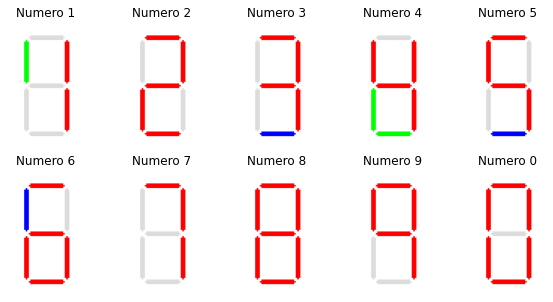

In [7]:
fig = plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,(i-1)%10+1), plt.imshow(pintar_num(i,sol_tree,sol_tree_)), plt.title('Numero '+str(i))
    plt.axis('off')

plt.show()

fig.savefig("7-Seg.png", bbox_inches='tight')

#### Guardar arboles escogidos

In [10]:
with open("best_tree_7seg_PG.bin","wb") as f:
    pickle.dump(sol_tree, f)

### Probar arboles guardados

#### Cargar arboles escogidos

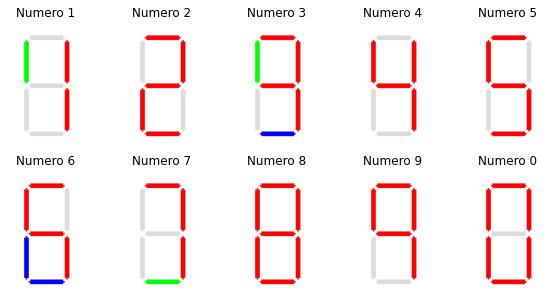

In [11]:
with open("best_tree_7seg_PG.bin","rb") as f:
    saved_trees = pickle.load(f)

fig = plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,(i-1)%10+1), plt.imshow(pintar_num(i,saved_trees,sol_tree_)), plt.title('Numero '+str(i))
    plt.axis('off')

plt.show()

fig.savefig("7-Seg.png", bbox_inches='tight')